# 1.0 An end-to-end classification problem (Part I)



## 1.1 Dataset description


In this document, we will analyze and predict the **price of Airbnb** in the city of **Rio de Janeiro** based on different information.


You can download the data from [Ivanovitch Silva, Google Drive](https://drive.google.com/file/d/16zF4MHEP_bBxAEWpQgVocPupTjRRAgfP/view).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Load libraries

In [1]:
!pip install seaborn
!pip install sklearn
!pip install pandas_profiling

In [3]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tempfile
import os
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

## 1.3 Get data & Exploratory Data Analysis (EDA)

### 1.3.1 Create the raw_data artifact

In [11]:
# importing the dataset
airbnb = pd.read_csv("listings.csv")
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.69
3,35636,https://www.airbnb.com/rooms/35636,20211224070558,2021-12-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.82
4,35764,https://www.airbnb.com/rooms/35764,20211224070558,2021-12-25,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,2.76


In [12]:
airbnb.to_csv("raw_data.csv",index=False)

In [13]:
# Login to Weights & Biases
wandb.login(relogin=True)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /home/vitor/.netrc


True

In [19]:
# Send the raw_data.csv to the Wandb storing it as an artifact
!wandb artifact put \
      --name airbnb/raw_data.csv \
      --type raw_data \
      --description "The raw data from Airbnb - Rio de Janeiro" raw_data.csv

wandb: Uploading file raw_data.csv to: "vitor-gabo/airbnb/raw_data.csv:latest" (raw_data)
wandb: Currently logged in as: vitor-gabo. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.21
wandb: Run data is saved locally in /home/vitor/UFRN/Tecnologia da Informação/2022.1/MLOps/Airbnb/wandb/run-20220711_195448-282v2bj0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run wise-serenity-5
wandb: ⭐️ View project at https://wandb.ai/vitor-gabo/airbnb
wandb: 🚀 View run at https://wandb.ai/vitor-gabo/airbnb/runs/282v2bj0
Artifact uploaded, use this artifact in a run by adding:

    artifact = run.use_artifact("vitor-gabo/airbnb/raw_data.csv:latest")

wandb: Waiting for W&B process to finish... (success).
wandb:                                                                                
wandb: Synced wise-serenity-5: https://wandb.ai/vitor-gabo/airbnb/runs/282v2bj0
wandb: Synced 6 W&B file(s), 0 media file(s), 1 artifact file(s) and 0 oth

### 1.3.2 Download raw_data artifact from Wandb

In [20]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="airbnb", save_code=True)

In [21]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("airbnb/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [22]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.69
3,35636,https://www.airbnb.com/rooms/35636,20211224070558,2021-12-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.82
4,35764,https://www.airbnb.com/rooms/35764,20211224070558,2021-12-25,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,2.76


Depois de realizar uma análise em relação as variáveis mais interessantes do dataset, selecionou-se as *features* mostradas abaixo

In [23]:
# columns used 
columns = ['latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
          'bedrooms','beds','price','review_scores_rating',]

airbnb = df[columns]
airbnb.head()

,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,-22.96599,-43.17940,Entire home/apt,5,NaN,2.0,2.0,$350.00,4.68
1,-22.98405,-43.20189,Entire home/apt,2,NaN,1.0,1.0,$296.00,4.73
2,-22.97735,-43.19105,Entire home/apt,3,NaN,1.0,1.0,$387.00,4.68
3,-22.98839,-43.19232,Entire home/apt,2,NaN,1.0,1.0,$172.00,4.72
4,-22.98107,-43.19136,Entire home/apt,2,NaN,1.0,1.0,$260.00,4.89


Tratamento das variáveis:

In [24]:
airbnb.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating
count,24549.000000,24549.000000,24549.000000,0.0,23059.000000,24202.000000,15588.000000
mean,-22.966484,-43.247681,4.175445,NaN,1.716943,2.627262,4.620983
std,0.035107,0.096663,2.488227,NaN,1.112336,2.270393,0.871163
min,-23.072670,-43.698710,0.000000,NaN,1.000000,1.000000,0.000000
25%,-22.984730,-43.299980,2.000000,NaN,1.000000,1.000000,4.670000
50%,-22.972390,-43.195790,4.000000,NaN,1.000000,2.000000,4.880000
75%,-22.953280,-43.185980,5.000000,NaN,2.000000,3.000000,5.000000
max,-22.749690,-43.104400,16.000000,NaN,47.000000,91.000000,5.000000


### 1.3.3 Pandas Profilling

In [25]:
ProfileReport(airbnb, title="Pandas Profiling Report", explorative=True)

ModuleNotFoundError: No module named 'ipywidgets'

In [26]:
# There are duplicated rows
airbnb.duplicated().sum()

2

In [28]:
# Delete duplicated rows
airbnb.drop_duplicates(inplace=True)
airbnb.duplicated().sum()

/tmp/ipykernel_20517/736449753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb.drop_duplicates(inplace=True)


0

### 1.3.4 EDA Manually

In [29]:
# what the sex column can help us?
pd.crosstab(airbnb.high_income,df.sex,margins=True,normalize=True)

AttributeError: 'DataFrame' object has no attribute 'high_income'

In [16]:
# income vs [sex & race]?
pd.crosstab(df.high_income,[df.sex,df.race],margins=True)

sex                      Female                                           \
race         Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White   
high_income                                                                
 <=50K                      107                 303   1465    103   7605   
 >50K                        12                  43     90      6   1028   
All                         119                 346   1555    109   8633   

sex                        Male                                           \
race         Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White   
high_income                                                                
 <=50K                      168                 459   1270    143  13075   
 >50K                        24                 233    297     19   6087   
All                         192                 692   1567    162  19162   

sex            All  
race                
high_income         
 <=50K       24698  
 >50K         7839  
All          32537

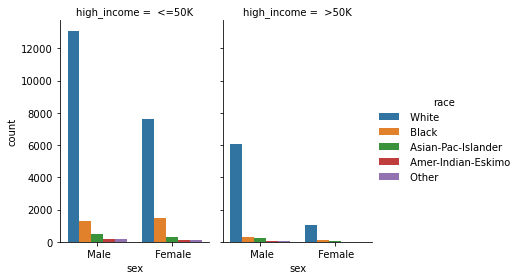

In [17]:
%matplotlib inline

sns.catplot(x="sex", 
            hue="race", 
            col="high_income",
            data=df, kind="count",
            height=4, aspect=.7)
plt.show()

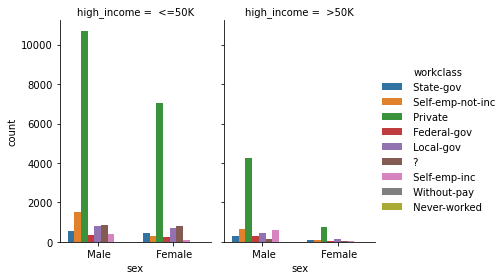

In [18]:
g = sns.catplot(x="sex", 
                hue="workclass", 
                col="high_income",
                data=df, kind="count",
                height=4, aspect=.7)

g.savefig("HighIncome_Sex_Workclass.png", dpi=100)

run.log(
        {
            "High_Income vs Sex vs Workclass": wandb.Image("HighIncome_Sex_Workclass.png")
        }
    )

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

## 1.4 Train & Split

In [20]:
splits = {}
splits["train"], splits["test"] = train_test_split(df,
                                                   test_size=0.30,
                                                   random_state=41,
                                                   stratify=df["high_income"])

In [21]:
# Save the artifacts. We use a temporary directory so we do not leave
# any trace behind

with tempfile.TemporaryDirectory() as tmp_dir:

    for split, df in splits.items():

        # Make the artifact name from the provided root plus the name of the split
        artifact_name = f"data_{split}.csv"

        # Get the path on disk within the temp directory
        temp_path = os.path.join(tmp_dir, artifact_name)

        # Save then upload to W&B
        df.to_csv(temp_path,index=False)

        artifact = wandb.Artifact(
            name=artifact_name,
            type="raw_data",
            description=f"{split} split of dataset week_07_eda/raw_data.csv:latest",
        )
        artifact.add_file(temp_path)

        run.log_artifact(artifact)

        # This waits for the artifact to be uploaded to W&B. If you
        # do not add this, the temp directory might be removed before
        # W&B had a chance to upload the datasets, and the upload
        # might fail
        artifact.wait()

### 1.4.1 Donwload the train and test artifacts

In [22]:
# donwload the latest version of artifacts data_test.csv and data_train.csv
artifact_train = run.use_artifact("week_07_eda/data_train.csv:latest")
artifact_test = run.use_artifact("week_07_eda/data_test.csv:latest")

# create a dataframe from each artifact
df_train = pd.read_csv(artifact_train.file())
df_test  = pd.read_csv(artifact_test.file())

In [23]:
print("Train: {}".format(df_train.shape))
print("Test: {}".format(df_test.shape))

Train: (22775, 15)
Test: (9762, 15)


In [ ]:
run.finish()